## Kudo Jr. Data Analyst Challenge - EDA using Python

Exploratory data analysis for the **Kudo Jr. Data Analyst Challenge**.

*This is a complimentary attachment to show how to do a simple analysis using python, the main work was done using Tableau.*

You can see the Tableau Dashboard [here](https://public.tableau.com/views/KudoJr_DataAnalystChallenge/KudoJr_DataAnalystChallengeDashboard?:language=en-US&:display_count=n&:origin=viz_share_link).

### Imports

In [176]:
import pandas as pd
import matplotlib.pyplot as plt

### Importing the data

In [177]:
# Read each Excel sheet
customer_df = pd.read_excel('kudo_test_jr_data_analyst.xlsx', sheet_name='customer')
customer_subscription_df = pd.read_excel('kudo_test_jr_data_analyst.xlsx', sheet_name='customer_subscription')
subscriptions_df = pd.read_excel('kudo_test_jr_data_analyst.xlsx', sheet_name='subscriptions')
customer_meetings_df = pd.read_excel('kudo_test_jr_data_analyst.xlsx', sheet_name='customer_meetings')

In [178]:
# Info about the customer dataframe
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30 non-null     int64 
 1   name    30 non-null     object
 2   type    30 non-null     object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


In [179]:
# Prints the first five rows of the customer dataframe
customer_df.head()

,id,name,type
0,1,Kaitlin Roberson MN,Customer
1,2,Jaslene Price DC,Customer
2,3,Brent Hoover IL,Partner
3,4,Meredith Page NY,Partner
4,5,Sam Webster DC,Customer


In [180]:
# Check for null values in each dataframe
print(customer_df.isnull().values.any())
print(customer_subscription_df.isnull().values.any())
print(subscriptions_df.isnull().values.any())
print(customer_meetings_df.isnull().values.any())

False
False
False
False


We can see that this is a relatively small dataset and it does not contain dirty values to clean, so let's proceed with the analysis.

### Joining the dataframes

In [181]:
# Left Join between the customer_meetings and customer dataframes.
meetings_and_customer_df = pd.merge(customer_meetings_df, customer_df, left_on='customer_id', right_on='id', how='left', suffixes=('', '_drop'))

# Drop duplicated columns
meetings_and_customer_df.drop([col for col in meetings_and_customer_df.columns if 'drop' in col], axis=1, inplace=True)

meetings_and_customer_df.head()

,id,customer_id,meeting_date,meeting_duration_seconds,name,type
0,1,4,2022-03-28,198,Meredith Page NY,Partner
1,2,30,2022-09-04,430,Tori Schaefer VI,Partner
2,3,3,2022-07-08,89,Brent Hoover IL,Partner
3,4,21,2022-03-16,150,Emilia Choi SD,Customer
4,5,1,2022-03-15,93,Kaitlin Roberson MN,Customer


In [182]:
# Left Join between the previously generated dataframe and customer_subscription dataframe.
meetings_and_customer_df = pd.merge(meetings_and_customer_df, customer_subscription_df, on='customer_id', how="left", suffixes=('', '_drop'))

# Drop duplicated columns
meetings_and_customer_df.drop([col for col in meetings_and_customer_df.columns if 'drop' in col], axis=1, inplace=True)

meetings_and_customer_df.head()

,id,customer_id,meeting_date,meeting_duration_seconds,name,type,subscription_id
0,1,4,2022-03-28,198,Meredith Page NY,Partner,1
1,2,30,2022-09-04,430,Tori Schaefer VI,Partner,4
2,3,3,2022-07-08,89,Brent Hoover IL,Partner,1
3,4,21,2022-03-16,150,Emilia Choi SD,Customer,2
4,5,1,2022-03-15,93,Kaitlin Roberson MN,Customer,4


In [183]:
# Left Join between the previously generated dataframe and subscriptions dataframe.
meetings_and_customer_df = pd.merge(meetings_and_customer_df, subscriptions_df, left_on='subscription_id', right_on='id', how="left", suffixes=('', '_drop'))

# Prevent the subscription name of being removed
meetings_and_customer_df.rename(columns = {'name_drop':'subscription_name'}, inplace=True) 

# Drop duplicated columns
meetings_and_customer_df.drop([col for col in meetings_and_customer_df.columns if 'drop' in col], axis=1, inplace=True)

meetings_and_customer_df

,id,customer_id,meeting_date,meeting_duration_seconds,name,type,subscription_id,subscription_name,purchased_hours,price
0,1,4,2022-03-28,198,Meredith Page NY,Partner,1,Basic,10,100
1,2,30,2022-09-04,430,Tori Schaefer VI,Partner,4,Premium,100,700
2,3,3,2022-07-08,89,Brent Hoover IL,Partner,1,Basic,10,100
3,4,21,2022-03-16,150,Emilia Choi SD,Customer,2,Regular,30,270
4,5,1,2022-03-15,93,Kaitlin Roberson MN,Customer,4,Premium,100,700
...,...,...,...,...,...,...,...,...,...,...
295,296,6,2022-08-26,200,Lisa Coleman NM,Partner,1,Basic,10,100
296,297,28,2022-07-10,273,Quinn Gregory FL,Customer,3,Advanced,50,400
297,298,24,2022-08-09,271,Tomas Barron MI,Customer,1,Basic,10,100
298,299,10,2022-11-04,211,Darryl Frazier TX,Customer,4,Premium,100,700


### Getting some insights from graphs

<AxesSubplot:xlabel='type'>

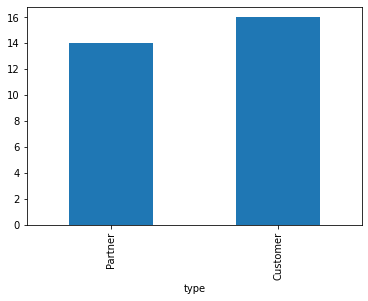

In [184]:
# Number of Partners and Customers (sorted asc.)
meetings_and_customer_df.groupby("type").nunique()["customer_id"].sort_values().plot(kind="bar")

<AxesSubplot:ylabel='customer_id'>

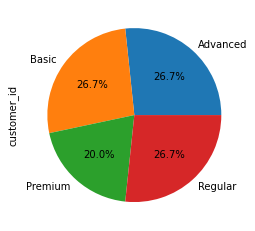

In [185]:
# Subscriptions type distribution
meetings_and_customer_df.groupby("subscription_name").nunique()["customer_id"].plot(kind="pie", autopct='%.1f%%')

<AxesSubplot:xlabel='meeting_date'>

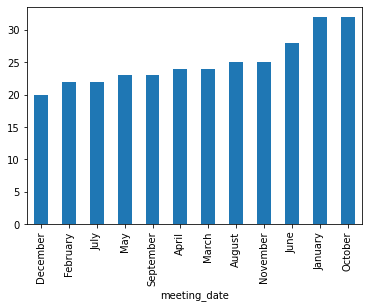

In [186]:
# Meetings per month (sorted asc.)
meetings_and_customer_df.groupby(meetings_and_customer_df["meeting_date"].dt.strftime('%B')).count()["id"].sort_values().plot(kind="bar")

<AxesSubplot:xlabel='name', ylabel='Duration (seconds)'>

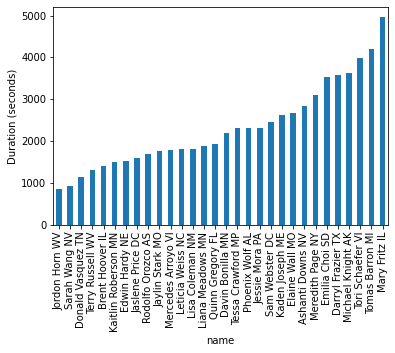

In [187]:
# How many seconds each user spend in meetings (sorted asc.)
meetings_and_customer_df.groupby(meetings_and_customer_df["name"]).sum()["meeting_duration_seconds"].sort_values().plot(kind="bar",ylabel="Duration (seconds)")

These are just some examples I coded to show my proficiency using Python. 

For a further analysis, visit the Tableau Dashboard and the slides presented.